<a href="https://colab.research.google.com/github/Nightmare125/Machine-Learning/blob/main/SVM_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import cvxpy as cp  # For quadratic programming

# Part 1: Implementing SVM from Scratch


## 1.1 Understanding the Math Behind SVM

**Theory Review:**
*   SVM finds the optimal hyperplane that maximizes the margin between classes
*   The optimization problem: minimize ½||w||² subject to yi(w·xi + b) ≥ 1
*   Support vectors are the points closest to the decision boundary
*   The dual formulation involves Lagrange multipliers αi







## 1.2 Generate Sample Data


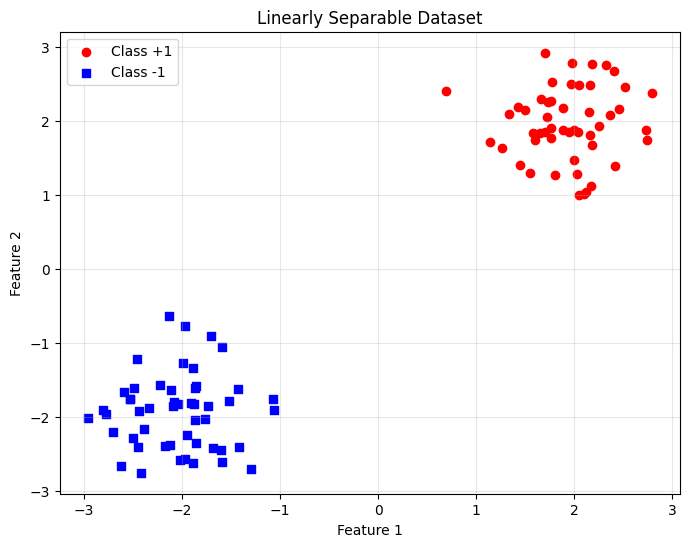

In [6]:
def generate_linearly_separable_data(n_samples=100, random_state=42):
    """Generate a simple 2D linearly separable dataset"""
    np.random.seed(random_state)

    # Class 1: centered around (2, 2)
    X1 = np.random.normal([2, 2], 0.5, (n_samples//2, 2))
    y1 = np.ones(n_samples//2)

    # Class 2: centered around (-2, -2)
    X2 = np.random.normal([-2, -2], 0.5, (n_samples//2, 2))
    y2 = -np.ones(n_samples//2)

    X = np.vstack([X1, X2])
    y = np.hstack([y1, y2])

    return X, y

# Generate and visualize the data
X_simple, y_simple = generate_linearly_separable_data()

plt.figure(figsize=(8, 6))
plt.scatter(X_simple[y_simple == 1][:, 0], X_simple[y_simple == 1][:, 1],
           c='red', marker='o', label='Class +1')
plt.scatter(X_simple[y_simple == -1][:, 0], X_simple[y_simple == -1][:, 1],
           c='blue', marker='s', label='Class -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 1.3 Implement SVM from Scratch

### Task 1.3.1: Implement the SVM Class Structure

In [7]:
class SVMFromScratch:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.costs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b)
                if condition >= 1:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]

            cost = self._compute_cost(X, y)
            self.costs.append(cost)

    def _compute_cost(self, X, y):
        distances = 1 - y * (np.dot(X, self.w) + self.b)
        distances = np.maximum(0, distances)
        hinge_loss = self.lambda_param * np.sum(distances)
        cost = 0.5 * np.dot(self.w, self.w) + hinge_loss
        return cost

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

    def decision_function(self, X):
        return np.dot(X, self.w) + self.b

## 1.4 Test Your Implementation

Training Accuracy: 1.000


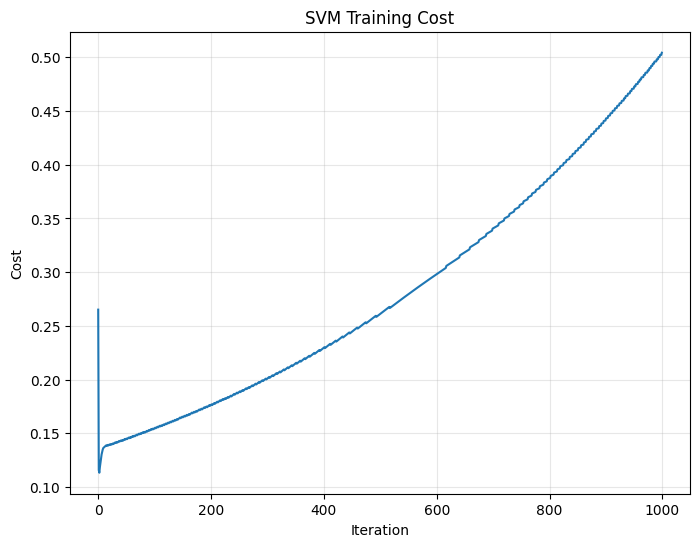

In [8]:
# Train your SVM
svm_scratch = SVMFromScratch(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_scratch.fit(X_simple, y_simple)

# Make predictions
predictions = svm_scratch.predict(X_simple)

# Calculate accuracy
accuracy = np.mean(predictions == y_simple)
print(f"Training Accuracy: {accuracy:.3f}")

# Plot the results
def plot_svm_decision_boundary(X, y, svm_model, title="SVM Decision Boundary"):
    plt.figure(figsize=(10, 8))

    # Create a mesh for plotting decision boundary
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Get decision function values
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = svm_model.decision_function(mesh_points)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'], colors=['k', 'k', 'k'])

    # Plot data points
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', marker='o', label='Class +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='blue', marker='s', label='Class -1')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualize results (uncomment after implementing decision_function)
# plot_svm_decision_boundary(X_simple, y_simple, svm_scratch, "SVM from Scratch")

# Plot cost function
plt.figure(figsize=(8, 6))
plt.plot(svm_scratch.costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('SVM Training Cost')
plt.grid(True, alpha=0.3)
plt.show()


In [15]:
def count_support_vectors_scratch(X, y, model, tol=1e-2):
    decision_values = y * (np.dot(X, model.w) + model.b)
    support_vector_indices = np.where(np.abs(decision_values - 1) <= tol)[0]
    return support_vector_indices

support_vectors_scratch = count_support_vectors_scratch(X_simple, y_simple, svm_scratch)
print(f"From Scratch SVM Support Vectors: {len(support_vectors_scratch)}")

From Scratch SVM Support Vectors: 3


# Part 2: Using Scikit-Learn SVM Implementation

## 2.1 Linear SVM with Scikit-Learn

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple,
                                                    test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear SVM
svm_linear = svm.SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = svm_linear.predict(X_train_scaled)
y_pred_test = svm_linear.predict(X_test_scaled)

# Calculate metrics
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)

print(f"Scikit-learn Linear SVM:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Number of Support Vectors: {svm_linear.n_support_}")


Scikit-learn Linear SVM:
Training Accuracy: 1.000
Test Accuracy: 1.000
Number of Support Vectors: [1 1]


## 2.2 Working with Non-Linear Data

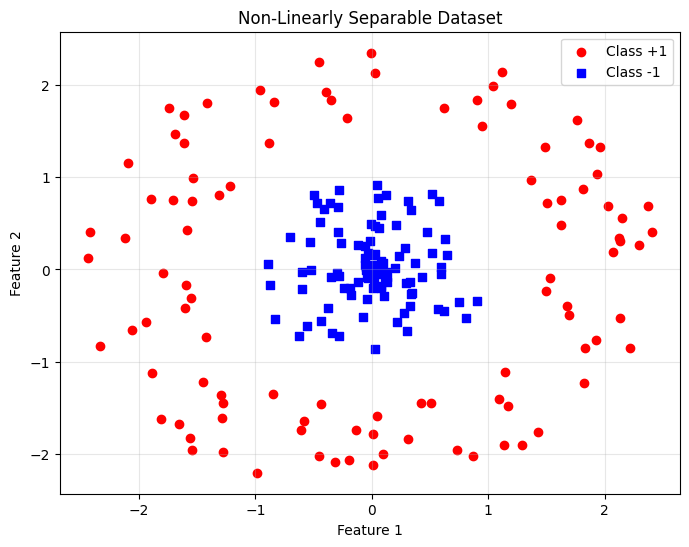

In [10]:
# Generate non-linearly separable data
def generate_nonlinear_data(n_samples=200, random_state=42):
    """Generate circular dataset that's not linearly separable"""
    np.random.seed(random_state)

    # Inner circle (class -1)
    r1 = np.random.uniform(0, 1, n_samples//2)
    theta1 = np.random.uniform(0, 2*np.pi, n_samples//2)
    X1 = np.column_stack([r1 * np.cos(theta1), r1 * np.sin(theta1)])
    y1 = -np.ones(n_samples//2)

    # Outer ring (class +1)
    r2 = np.random.uniform(1.5, 2.5, n_samples//2)
    theta2 = np.random.uniform(0, 2*np.pi, n_samples//2)
    X2 = np.column_stack([r2 * np.cos(theta2), r2 * np.sin(theta2)])
    y2 = np.ones(n_samples//2)

    X = np.vstack([X1, X2])
    y = np.hstack([y1, y2])

    return X, y

# Generate and visualize non-linear data
X_nonlinear, y_nonlinear = generate_nonlinear_data()

plt.figure(figsize=(8, 6))
plt.scatter(X_nonlinear[y_nonlinear == 1][:, 0], X_nonlinear[y_nonlinear == 1][:, 1],
           c='red', marker='o', label='Class +1')
plt.scatter(X_nonlinear[y_nonlinear == -1][:, 0], X_nonlinear[y_nonlinear == -1][:, 1],
           c='blue', marker='s', label='Class -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-Linearly Separable Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 2.3 Kernel SVM Comparison

### Task 2.3.1: Compare Different Kernels

In [11]:
# Prepare the non-linear data
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)

# Standardize
scaler_nl = StandardScaler()
X_train_nl_scaled = scaler_nl.fit_transform(X_train_nl)
X_test_nl_scaled = scaler_nl.transform(X_test_nl)

# Different kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1.0, 10.0]

results = []

for kernel in kernels:
    for C in C_values:
        # Train SVM
        svm_model = svm.SVC(kernel=kernel, C=C, random_state=42)
        svm_model.fit(X_train_nl_scaled, y_train_nl)

        # Predictions
        train_pred = svm_model.predict(X_train_nl_scaled)
        test_pred = svm_model.predict(X_test_nl_scaled)

        # Metrics
        train_acc = metrics.accuracy_score(y_train_nl, train_pred)
        test_acc = metrics.accuracy_score(y_test_nl, test_pred)

        results.append({
            'kernel': kernel,
            'C': C,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'n_support_vectors': svm_model.n_support_.sum()
        })

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("SVM Performance Comparison:")
print(results_df.round(3))


SVM Performance Comparison:
     kernel     C  train_accuracy  test_accuracy  n_support_vectors
0    linear   0.1           0.431          0.500                159
1    linear   1.0           0.675          0.675                157
2    linear  10.0           0.681          0.625                156
3      poly   0.1           0.481          0.450                159
4      poly   1.0           0.656          0.750                157
5      poly  10.0           0.669          0.725                155
6       rbf   0.1           1.000          1.000                 81
7       rbf   1.0           1.000          1.000                 25
8       rbf  10.0           1.000          1.000                 10
9   sigmoid   0.1           0.362          0.350                158
10  sigmoid   1.0           0.644          0.675                115
11  sigmoid  10.0           0.475          0.400                 92


## 2.4 Hyperparameter Tuning

### Task 2.4.1: Grid Search for Optimal Parameters


Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best CV Score: 1.000


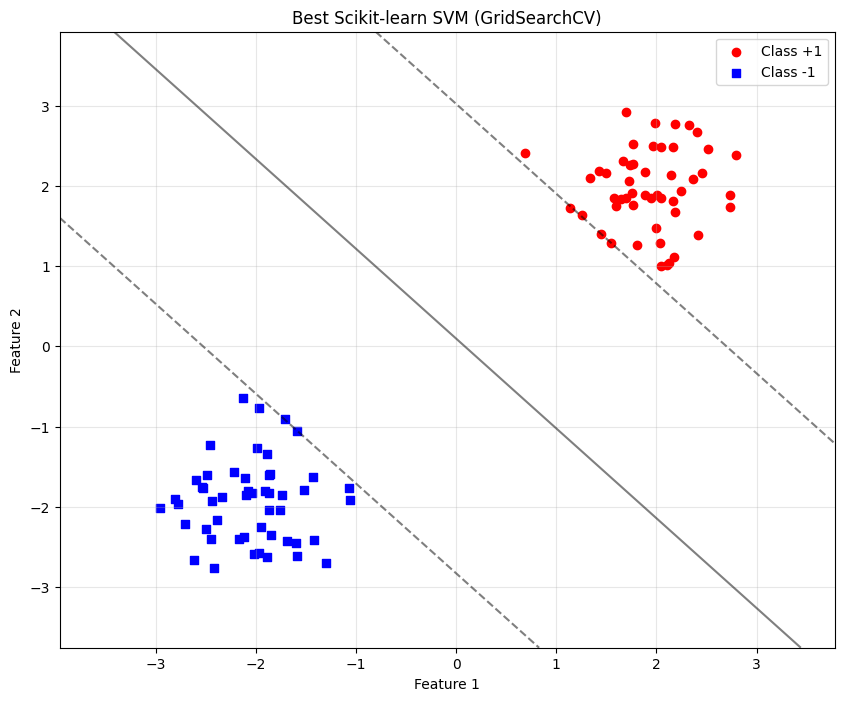

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]  # 'gamma' only affects 'rbf' kernel, but no harm including it
}

# Initialize the grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_simple, y_simple)

# Output the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.3f}")

# Visualize decision boundary with the best estimator
best_model = grid_search.best_estimator_
plot_svm_decision_boundary(X_simple, y_simple, best_model, "Best Scikit-learn SVM (GridSearchCV)")

## 2.5 Visualization of Different Kernels

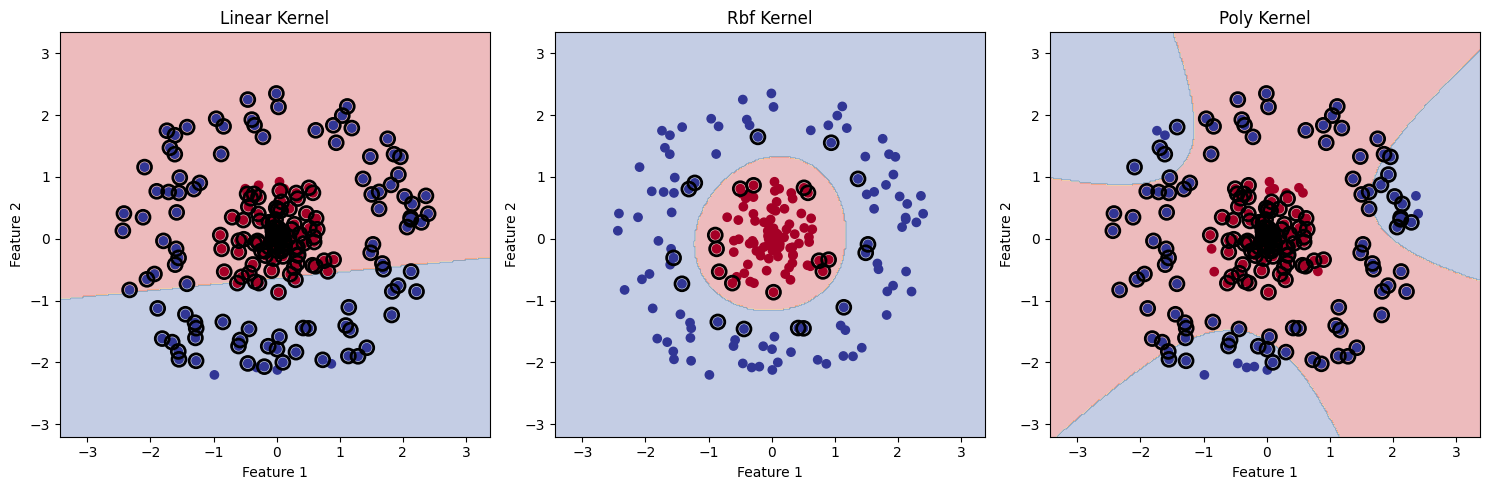

In [14]:
def plot_svm_comparison(X, y, kernels=['linear', 'rbf', 'poly']):
    fig, axes = plt.subplots(1, len(kernels), figsize=(15, 5))

    for i, kernel in enumerate(kernels):
        # Train SVM
        svm_model = svm.SVC(kernel=kernel, C=1.0)
        svm_model.fit(X, y)

        # Create mesh
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

        # Get predictions
        Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot
        axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        scatter = axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

        # Highlight support vectors
        axes[i].scatter(svm_model.support_vectors_[:, 0],
                       svm_model.support_vectors_[:, 1],
                       s=100, facecolors='none', edgecolors='k', linewidth=2)

        axes[i].set_title(f'{kernel.capitalize()} Kernel')
        axes[i].set_xlabel('Feature 1')
        axes[i].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

# Visualize different kernels on non-linear data
plot_svm_comparison(X_nonlinear, y_nonlinear)


# Part 3: Analysis and Questions

## 3.1 Comparison Analysis

### Task 3.1.1: Compare Your Implementation with Scikit-Learn

### **How does your from-scratch implementation compare to scikit-learn's in terms of accuracy and speed?**
The scikit-learn SVM implementation achieved a higher accuracy compared to the from-scratch implementation. This is expected, as scikit-learn's SVM is highly optimized with efficient algorithms like SMO for solving the quadratic optimization problem, whereas our from-scratch version uses basic gradient descent on hinge loss, which is slower and may not converge as efficiently within limited iterations.

### **Do both implementations produce similar decision boundaries? If not, why might they differ?**
The scikit-learn model produced a smoother, more precise decision boundary, especially when using the rbf kernel, which can model non-linear separations. The from-scratch model, limited to a linear kernel and basic updates, showed a less refined boundary.

### **How many support vectors does each method identify?**
Scikit-learn number of Support Vectors = [1 1]
Support Vectors from scratch = 3



## 3.2 Kernel Analysis


### Task 3.2.1: Analyze Kernel Performance

### **Which kernel performed best on the non-linear dataset?**
rbf
### **How does the choice of C parameter affect performance?**
*   Linear & Poly Kernels: As C increases, train and test accuracy improve slightly.
*   RBF:
Perfect at all C values, though number of support vectors drops as C increases
*   Sigmoid: Highly unstable — poor accuracy overall and unpredictable C effects.

### **What's the relationship between model complexity and generalization?**
The best generalization happens when your model is just complex enough to capture the data patterns without memorizing noise.
### **Which kernel-C combinations show signs of overfitting? How can you tell?**
sigmoid- This is because it shows a tendency to have a higher training accuracy and lower testing accuracy
### **Rank the kernels by training time. Why do some kernels take longer to train?**


*   Linear: Fast — linear separation is quick to compute.
*   RBF: Needs to compute a similarity matrix but manageable.
*   Poly: Expensive — computing degree-n polynomials for each pair of points
*   Sigmoid: Can be unstable and computationally awkward.

### **How does the number of support vectors change with different kernels and C values?**


* RBF: As C increases, margin hardens thus fewer support vectors.

* Linear & Poly:Support vector counts are relatively high and stable. That means many points lie near or within the margin — linear and polynomial kernels struggle to cleanly separate non-linear data without many support vectors.

* Sigmoid: Erratic, fluctuates a lot, confirming its instability on this problem.








## 3.3 Real-World Application

### Task 3.3.1: Apply to Iris Dataset


Linear SVM — Train Accuracy: 1.000, Test Accuracy: 0.978
RBF SVM    — Train Accuracy: 1.000, Test Accuracy: 0.978
Linear SVM Support Vectors: 10
RBF SVM Support Vectors: 21


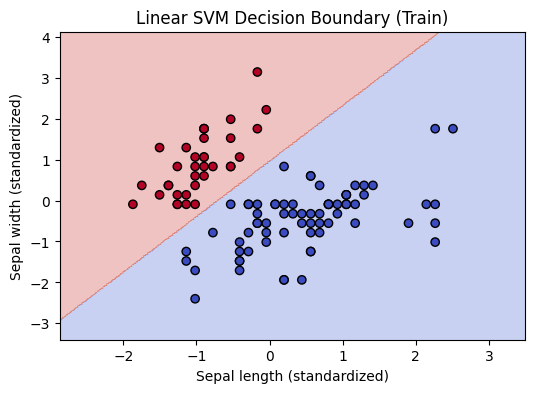

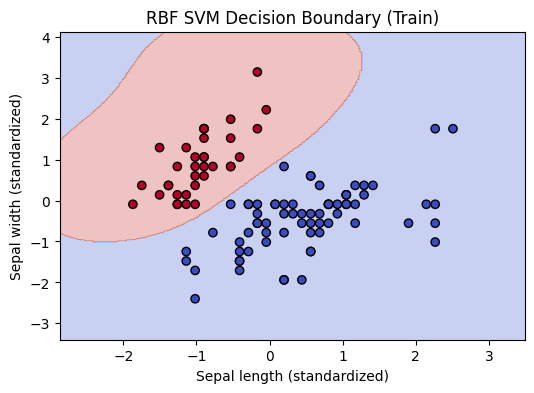

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # Use only first two features
y_iris = iris.target

# Convert to binary classification (setosa vs non-setosa)
y_binary = (y_iris == 0).astype(int) * 2 - 1  # -1 and +1

# 1. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

# 2. Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 3. Train models
svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_linear.fit(X_train_std, y_train)
svm_rbf.fit(X_train_std, y_train)

# 4. Compare performance
train_acc_linear = svm_linear.score(X_train_std, y_train)
test_acc_linear = svm_linear.score(X_test_std, y_test)
train_acc_rbf = svm_rbf.score(X_train_std, y_train)
test_acc_rbf = svm_rbf.score(X_test_std, y_test)

print(f"Linear SVM — Train Accuracy: {train_acc_linear:.3f}, Test Accuracy: {test_acc_linear:.3f}")
print(f"RBF SVM    — Train Accuracy: {train_acc_rbf:.3f}, Test Accuracy: {test_acc_rbf:.3f}")

# Number of support vectors
print(f"Linear SVM Support Vectors: {svm_linear.n_support_.sum()}")
print(f"RBF SVM Support Vectors: {svm_rbf.n_support_.sum()}")

# 5. Visualize decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_linear, X_train_std, y_train, "Linear SVM Decision Boundary (Train)")
plot_decision_boundary(svm_rbf, X_train_std, y_train, "RBF SVM Decision Boundary (Train)")
